|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |

### Bibliotecas

In [34]:
import numpy as np
import matplotlib.pyplot as plt

### Verificando os dados

In [35]:
dados = np.fromfile('rna-2025.1-pp2.1-dados/dataAll.txt')

In [36]:
m = dados.size//3
dados = dados.reshape((m,1,3))

In [37]:
X = np.array([[linha[0][0], linha[0][1]] for linha in dados])
y = np.array([[linha[0][2]] for linha in dados]).ravel()

### Perceptron

In [38]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.necessary_epochs = None
        self.total_adjust = 0
    
    def step(self, x):
        return 1 if x >= 0 else 0
    
    def check_error(self, y_predicted, y):
        return y_predicted != y

    def fit(self, X, y):
        """A função fit serve para treinar a nossa classe perceptron. Ao longo das épocas, a função realiza previsões e ajuda os pesos e o viés até atingir o número máximo de épocas definido anteriormente ou chegar em uma previsão sem erros.
        Parâmetros:
            X (np.ndarray): conjunto de treinamento.
            y (np.ndarray): rótulos correspondentes ao conjunto de treinamento.
        Retorna:
            None"""
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=2)
        print("Pesos iniciais: ", self.weights)
        self.bias = 0
        self.necessary_epochs = 0
        

        for _ in range(self.epochs):
            self.necessary_epochs +=1
            error_counter = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                if(self.check_error(y_predicted, y[idx])):
                    
                    update = self.learning_rate * (y[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_counter +=1
                    self.total_adjust+=1
                else:
                    pass
            if error_counter ==0:
                return

    def predict(self, X):
        return np.array([self.step(np.dot(X[i], self.weights) + self.bias) for i in range(X.shape[0])])


In [39]:
perceptron = Perceptron()
perceptron.fit(X, y)

Pesos iniciais:  [ 0.04004223 -0.35938906]


In [40]:

# Fazendo previsões
print(f"\nÉpocas necessárias: {perceptron.necessary_epochs}")
print(f"Total de ajuste de pesos: {perceptron.total_adjust}")
predictions = perceptron.predict(X)



Épocas necessárias: 11
Total de ajuste de pesos: 182


### Gráfico

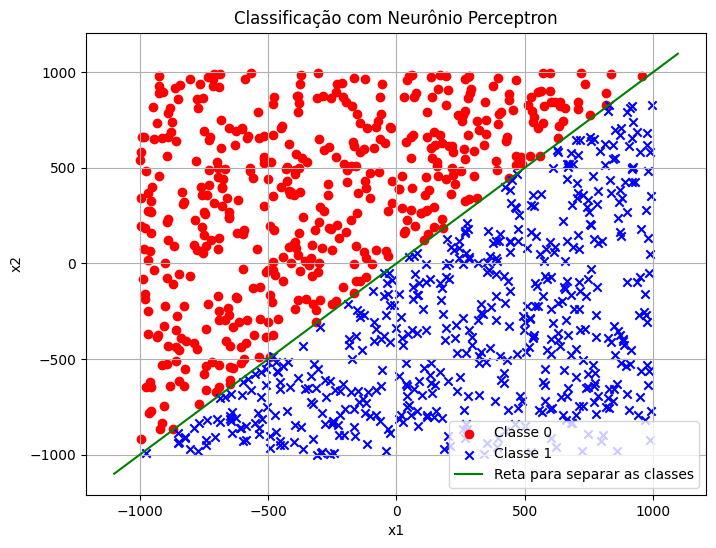

In [41]:
# Separar os pontos por classe
X0 = X[y == 0]
X1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Classe 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Classe 1')

xMin, xMax = plt.xlim()
xVals = np.linspace(xMin, xMax, 100)
w1, w2 = perceptron.weights
bias = perceptron.bias
yVals = -(w1 / w2) * xVals - (bias / w2)

plt.plot(xVals, yVals, color='green', label='Reta para separar as classes')

plt.title("Classificação com Neurônio Perceptron")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()